# IEOR 242 Assignment 10
Metrics for describing the data from the Pickle file.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
# Path to the Pickle file
PICKLE_FILE = 'prepared_reports_final.pickle'

## Data Loading
Read the dataframe with file contents and labels from a Pickle file.

In [3]:
class_df = pd.read_pickle(PICKLE_FILE)

print('Number of reports: %d' % len(class_df))
class_df.head()

Number of reports: 12504


,content,cik,year,quarter,subsector,name,tic,SALES_value,OIADP,AT,CEQ,SALES,OIADP_change,AT_change,CEQ_change,SALES_change
0,Item Management s Discussion and Analysis of ...,855654.0,2012.0,3.0,35201010.0,IMMUNOGEN INC,IMGN,3.252,pos,neg,neg,neg,19.30809539,-5.710814,-16.88298821,-9.225092251
1,The following discussion and analysis provide...,788920.0,2011.0,3.0,35101010.0,PRO-DEX INC/CO,PDEX,6.876,neg,pos,pos,neg,-14.5187602,14.640276,11.23801315,-1.89063409
2,Item Managements Discussion and Analysis of...,70487.0,2008.0,1.0,NaN,None,None,13.454,neg,pos,pos,neg,-22.56208359,0.525303,2.764397345,-11.54303553
3,BEGIN PRIVACY ENHANCED MESSAGE Proc ...,1027915.0,1999.0,2.0,NaN,None,None,7.873,neg,neg,pos,neg,-814.6341463,-56.183942,15.27777778,-65.41343833
4,Item Management s Discussion and Analy...,749660.0,2003.0,1.0,NaN,None,None,2.214,pos,neg,neg,neg,328.5234899,-1.733328,-5.815035355,-39.56639566


In [4]:
# Number of companies
len(class_df['cik'].unique())

1864

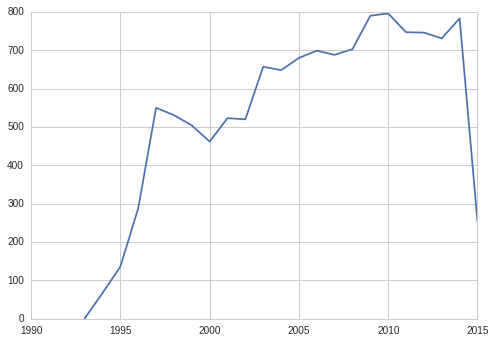

In [5]:
# Number of reports over the years
year_count = class_df.groupby('year').count()
plt.plot(year_count.index, year_count['content'])

In [6]:
# Replace subsector codes with subsector names
class_df['Subsector Name'] = np.nan
class_df['Subsector Name'].categories = ['Biotechnology', 'Health Care Equipment', 'Pharmaceuticals',
                                         'Health Care Services', 'Health Care Supplies',
                                         'Life Sciences Tools & Services', 'Health Care Technology',
                                         'Health Care Facilities', 'Health Care Distributors', 'Managed Health Care']
class_df.loc[class_df['subsector'] == 35201010.0, 'Subsector Name'] = 'Biotechnology'
class_df.loc[class_df['subsector'] == 35101010.0, 'Subsector Name'] = 'Health Care Equipment'
class_df.loc[class_df['subsector'] == 35202010.0, 'Subsector Name'] = 'Pharmaceuticals'
class_df.loc[class_df['subsector'] == 35102015.0, 'Subsector Name'] = 'Health Care Services'
class_df.loc[class_df['subsector'] == 35101020.0, 'Subsector Name'] = 'Health Care Supplies'
class_df.loc[class_df['subsector'] == 35203010.0, 'Subsector Name'] = 'Life Sciences Tools & Services'
class_df.loc[class_df['subsector'] == 35103010.0, 'Subsector Name'] = 'Health Care Technology'
class_df.loc[class_df['subsector'] == 35102020.0, 'Subsector Name'] = 'Health Care Facilities'
class_df.loc[class_df['subsector'] == 35102010.0, 'Subsector Name'] = 'Health Care Distributors'
class_df.loc[class_df['subsector'] == 35102030.0, 'Subsector Name'] = 'Managed Health Care'
class_df.head()

,content,cik,year,quarter,subsector,name,tic,SALES_value,OIADP,AT,CEQ,SALES,OIADP_change,AT_change,CEQ_change,SALES_change,Subsector Name
0,Item Management s Discussion and Analysis of ...,855654.0,2012.0,3.0,35201010.0,IMMUNOGEN INC,IMGN,3.252,pos,neg,neg,neg,19.30809539,-5.710814,-16.88298821,-9.225092251,Biotechnology
1,The following discussion and analysis provide...,788920.0,2011.0,3.0,35101010.0,PRO-DEX INC/CO,PDEX,6.876,neg,pos,pos,neg,-14.5187602,14.640276,11.23801315,-1.89063409,Health Care Equipment
2,Item Managements Discussion and Analysis of...,70487.0,2008.0,1.0,NaN,None,None,13.454,neg,pos,pos,neg,-22.56208359,0.525303,2.764397345,-11.54303553,NaN
3,BEGIN PRIVACY ENHANCED MESSAGE Proc ...,1027915.0,1999.0,2.0,NaN,None,None,7.873,neg,neg,pos,neg,-814.6341463,-56.183942,15.27777778,-65.41343833,NaN
4,Item Management s Discussion and Analy...,749660.0,2003.0,1.0,NaN,None,None,2.214,pos,neg,neg,neg,328.5234899,-1.733328,-5.815035355,-39.56639566,NaN


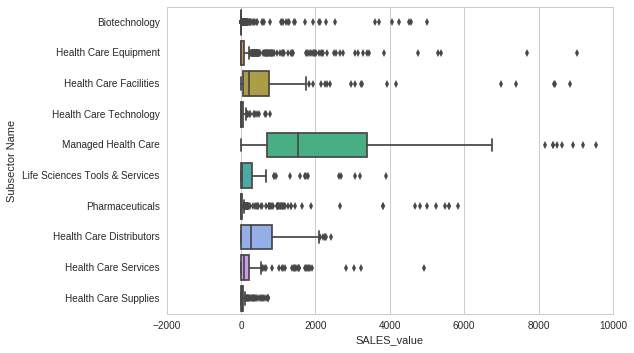

In [7]:
# Sales turnover per subsector
data_subsec = class_df[class_df['SALES_value'] < 10000]
sns.boxplot(x='SALES_value', y='Subsector Name', data=data_subsec)

/home/stefan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


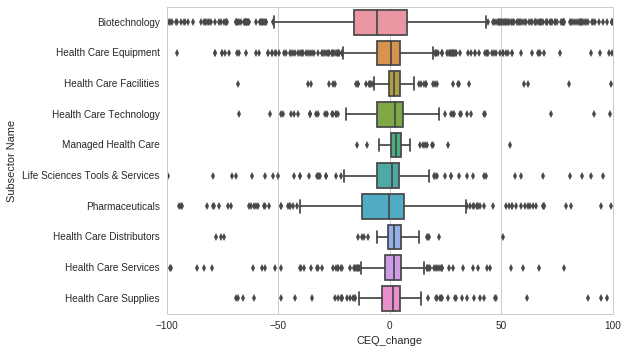

In [8]:
# Change in common equity per subsector
data_subsec = class_df
data_subsec['CEQ_change'] = data_subsec['CEQ_change'].convert_objects(convert_numeric=True)
data_subsec = data_subsec[(data_subsec['CEQ_change'] > -100) & (data_subsec['CEQ_change'] < 100)]
sns.boxplot(x='CEQ_change', y='Subsector Name', data=data_subsec)

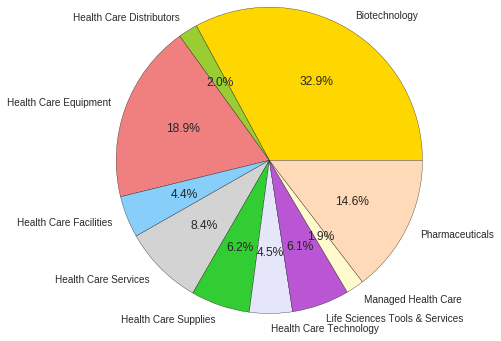

In [9]:
# Number of reports per subsector
subsec_count = class_df.groupby('Subsector Name').count()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgray', 'limegreen', 'lavender',
          'mediumorchid', 'lemonchiffon', 'peachpuff']
plt.pie(subsec_count['content'], labels=subsec_count.index, autopct='%1.1f%%', colors=colors)
plt.axis('equal')
plt.show()

/home/stefan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()
/home/stefan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/home/stefan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/home/stefan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


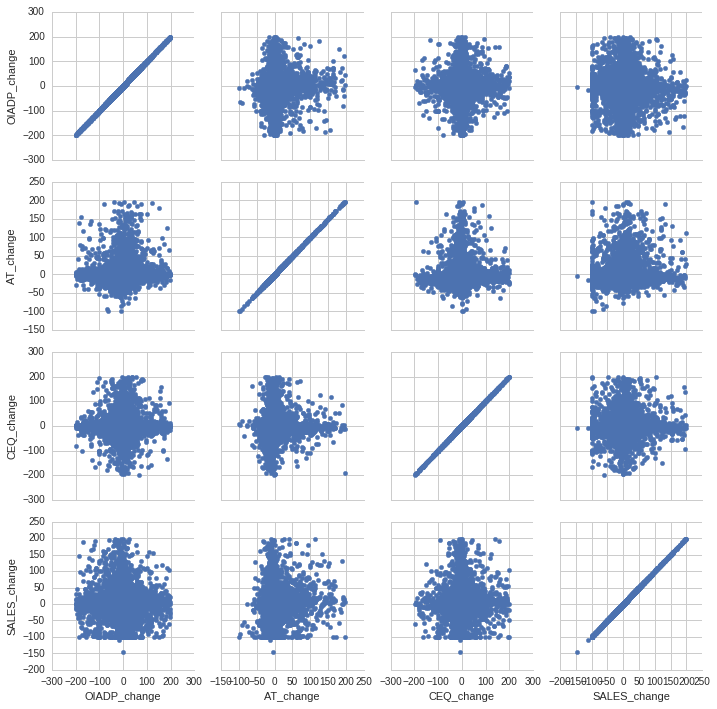

In [10]:
# Correlation matrix plot for all financial features
fin_change_corr = class_df[['OIADP_change', 'AT_change', 'CEQ_change', 'SALES_change']].dropna(axis=0, how='any')
fin_change_corr['OIADP_change'] = fin_change_corr['OIADP_change'].convert_objects(convert_numeric=True)
fin_change_corr = fin_change_corr[(fin_change_corr['OIADP_change'] > -200) & (fin_change_corr['OIADP_change'] < 200)]
fin_change_corr['AT_change'] = fin_change_corr['AT_change'].convert_objects(convert_numeric=True)
fin_change_corr = fin_change_corr[(fin_change_corr['AT_change'] > -200) & (fin_change_corr['AT_change'] < 200)]
fin_change_corr['CEQ_change'] = fin_change_corr['CEQ_change'].convert_objects(convert_numeric=True)
fin_change_corr = fin_change_corr[(fin_change_corr['CEQ_change'] > -200) & (fin_change_corr['CEQ_change'] < 200)]
fin_change_corr['SALES_change'] = fin_change_corr['SALES_change'].convert_objects(convert_numeric=True)
fin_change_corr = fin_change_corr[(fin_change_corr['SALES_change'] > -200) & (fin_change_corr['SALES_change'] < 200)]
g = sns.PairGrid(fin_change_corr)
g = g.map(plt.scatter)

/home/stefan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()
/home/stefan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


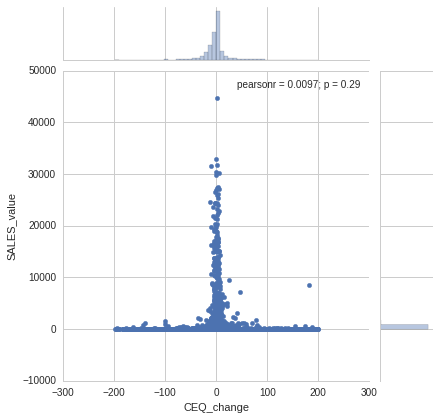

In [11]:
# Correlation plot, CEQ change vs. SALES value
sales_corr_df = class_df[['CEQ_change', 'SALES_value']].dropna(axis=0, how='any')
sales_corr_df['CEQ_change'] = sales_corr_df['CEQ_change'].convert_objects(convert_numeric=True)
sales_corr_df = sales_corr_df[(sales_corr_df['CEQ_change'] > -200) & (sales_corr_df['CEQ_change'] < 200)]
sales_corr_df['SALES_value'] = sales_corr_df['SALES_value'].convert_objects(convert_numeric=True)
sns.jointplot(x='CEQ_change', y='SALES_value', data=sales_corr_df)